In [1]:
### Imports the whole etch_roof_d3s sheet, which is quite memory-intensive

import pandas
df_full=pandas.read_csv(('etch_roof_d3s.csv'))
df_full

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,keV_per_ch,0,1,2,3,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,error_flag
0,2017-03-15 20:50:59+00:00,2017-03-15 13:50:59-07:00,1489611059,2121.6,20.599029,2.50,0,0,0,0,...,0,0,0,0,0,0,0,0,71,NaN
1,2017-03-15 20:55:59+00:00,2017-03-15 13:55:59-07:00,1489611359,2149.8,20.735477,2.50,0,0,0,0,...,0,0,0,0,0,0,0,0,55,NaN
2,2017-03-15 21:01:00+00:00,2017-03-15 14:01:00-07:00,1489611660,2192.2,20.938959,2.50,0,0,0,0,...,0,0,0,1,0,0,0,0,61,NaN
3,2017-03-15 21:14:54+00:00,2017-03-15 14:14:54-07:00,1489612494,2145.8,20.716177,2.50,0,0,0,0,...,0,0,0,0,0,1,0,0,78,NaN
4,2017-03-15 21:19:54+00:00,2017-03-15 14:19:54-07:00,1489612794,2119.6,20.589318,2.50,0,0,0,0,...,1,0,0,0,0,0,0,0,78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218286,2020-10-17 00:07:44+0000,10/16/2020 17:07,1602893264,2352.6,21.691473,2.57,0,0,0,0,...,0,1,0,0,0,0,0,0,63,0.0
218287,2020-10-17 00:12:44+0000,10/16/2020 17:12,1602893564,2307.6,21.483017,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,62,0.0
218288,2020-10-17 00:17:44+0000,10/16/2020 17:17,1602893864,2322.6,21.552726,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,59,0.0
218289,2020-10-17 00:22:44+0000,10/16/2020 17:22,1602894164,2344.2,21.652713,2.57,0,0,0,0,...,0,0,0,0,0,0,0,0,58,0.0


In [2]:
### Takes a 1 hour slice pretty much randomly from the full data frame and prepares for plotting

import pandas as pd
import numpy as np

df_slice = df_full[9998:10010].drop(columns=['deviceTime_utc','deviceTime_local','deviceTime_unix','cpm','cpmError','keV_per_ch','error_flag'])
totals = df_slice.sum(axis=0) # taking the totals of each column (one output per channel)
data = pd.DataFrame({'Total Counts':totals}) # creating a dataframe from the "totals" array
size_data = data.shape[0] # finding the number of channels (pretty unnecessary, but works as is; could just use 1024 for this value)
energies = np.linspace(2.5,(size_data)*2.5,size_data) # setting the energies for each individual channel
data.insert(loc=1,column='Energy',value=energies) # adding energy levels to the main dataframe
#data

## Can optionally be uncommented to process out "bands" of very low counts, could be a type of de-noising
#zeros = (data['Total Counts'] != 0)
#data = data[zeros]
#ones = (data['Total Counts'] != 1)
#data = data[ones]
#twos = (data['Total Counts'] != 2)
#data = data[twos]
data


,Total Counts,Energy
0,0,2.5
1,0,5.0
2,0,7.5
3,0,10.0
4,0,12.5
...,...,...
1019,0,2550.0
1020,0,2552.5
1021,0,2555.0
1022,0,2557.5


In [15]:
### Takes ~1 month from ~8/5-9/5/19 from the full data frame and prepares for plotting

import pandas as pd
import numpy as np

df_slice = df_full[182000:190400].drop(columns=['deviceTime_utc','deviceTime_local','deviceTime_unix','cpm','cpmError','keV_per_ch','error_flag'])
totals = df_slice.sum(axis=0) # taking the totals of each column (one output per channel)
data = pd.DataFrame({'Total Counts':totals}) # creating a dataframe from the "totals" array
size_data = data.shape[0] # finding the number of channels (pretty unnecessary, but works as is; could just use 1024 for this value)
energies = np.linspace(2.5,(size_data)*2.5,size_data) # setting the energies for each individual channel
data.insert(loc=1,column='Energy',value=energies) # adding energy levels to the main dataframe
#data

## Can optionally be uncommented to process out "bands" of very low counts, could be a type of de-noising
#zeros = (data['Total Counts'] != 0)
#data = data[zeros]
#ones = (data['Total Counts'] != 1)
#data = data[ones]
#twos = (data['Total Counts'] != 2)
#data = data[twos]
data


,Total Counts,Energy
0,0,2.5
1,0,5.0
2,0,7.5
3,0,10.0
4,0,12.5
...,...,...
1019,311,2550.0
1020,319,2552.5
1021,352,2555.0
1022,352,2557.5


In [ ]:
### Takes a row from the full data frame to prepare it for plotting

import pandas as pd
import numpy as np
d1=df_full.iloc[130000].to_numpy()
d1 = d1[6:-1]
d1 = pd.DataFrame({'Counts':d1})
size_d1 = d1.shape[0]
energies = np.linspace(2.5,(size_d1)*2.5,size_d1)
energy = pd.DataFrame({'Energy':energies})
data = pd.concat([d1,energy],axis=1)

zeros = (data['Counts'] != 0)
zeros
data = data[zeros]
data

In [17]:
import matplotlib.pyplot as mp

from scipy.signal import find_peaks as sp
import numpy as np

counts = data['Total Counts'].to_numpy()
peaks,_ = sp(counts,prominence = 5000)
peaks

array([ 39,  51,  55, 248, 582], dtype=int64)

## Background Fitting

In [18]:
### Trying out curve_fit for establishing background
## Must be manually fed left and right band ranges currently, look to generalize in the future
import numpy as np
from scipy.optimize import curve_fit

## Selecting x and y data for counts and channels that the function will fit to
#Left Band
start1 = 168
end1 = 229
n1 = end1-start1+1
channels1=np.linspace(start1,end1,n1)

#Right Band
start2 = 271
end2 = 338
n2 = end2-start2+1
channels2=np.linspace(start2,end2,n2)

#Combining and converting the data
channels = np.concatenate([channels1,channels2]) # creates a single "channels" array with a gap in the middle for the peak
count_4_fit=data.iloc[channels,0].to_numpy()

# Fitting counts to channels
def func(x,a,b,c,d,e):
    return a*x**4+b*x**3+c*x**2+d*x+e
popt,pcov=curve_fit(func,channels,count_4_fit)
popt

array([ 5.16532240e-05, -6.08174661e-02,  2.84499254e+01, -6.39878826e+03,
        6.08260579e+05])

In [19]:
### Preparing interpolation data for plotting

import pandas
import numpy as np

counts_original = data.iloc[start1:end2+1,0] # This line and next prepare arrays of the raw data to compare the interpolation to
channels_original = np.linspace(start1,end2,end2-start1+1)


fitted_counts = func(channels,*popt)

In [ ]:
### Plotting the section of original data, along with the fit curve
import matplotlib.pyplot as mp
%matplotlib tk


#mp.plot(channels_original,counts_original)
mp.plot(channels_original,counts_original)
mp.plot(channels,fitted_counts)
mp.xlabel('Channel #')
mp.ylabel('Counts')
mp.title('Approximating background radiation around the Bi-214 peak (4th-order poly)')

## Plotting

In [ ]:
### Creates a plot from the totaled counts and energy bins, shows up as a pop-up, seems pretty finnicky

import matplotlib.pyplot as mp
%matplotlib tk 
import numpy as np


mp.plot(data['Energy'],data['Total Counts'])
mp.yscale("log")
mp.xlabel('Energy (keV)')
mp.ylabel('counts')
mp.show()


In [20]:
### Plots interpolated data, original data, and peaks all together

import matplotlib.pyplot as mp
import matplotlib
%matplotlib tk

mp.plot(counts)
mp.plot(peaks,counts[peaks],"x")
mp.yscale("log")
mp.xlabel('Channel #')
mp.ylabel('Counts')
mp.title('Peaks found using scipy.signal.find_peaks')
mp.plot(channels,fitted_counts)
#mp.xlim(150,350)
#mp.ylim(10,300)
mp.show()

In [ ]:
### Finding the energies of the Bi-214 and K-40 peaks

# Bi-214 emits about 50% of its gammas at ~609.3 keV
print([248*2.5,582*2.5])

In [ ]:
### To find the maximum value over a range, useful for finding a peak knowing approximately where the peak should be
## Will cause problems if the range is too wide, since this code looks at absolute maximum only, so the peak could be 
## overshadowed by part of the left band

import numpy as np
peak_start = 225 # defines the starting and ending values for the search range
peak_end = 280
peakish=counts[peak_start:peak_end]
max=np.amax(peakish)
temp = np.where(peakish==max)
rel_index = temp[0][0] # returns the index of the input range where the max is located
peak_index = peak_start + rel_index # returns the index of the peak in the basis set of data
peak_index

In [ ]:
print(counts[239:249],max)

## Temporary Area

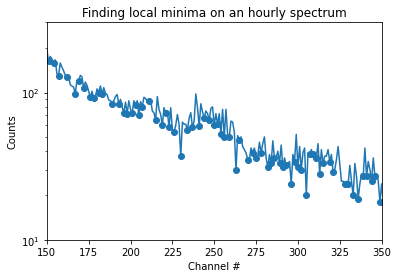

In [13]:
### Finding local minima from the data (to be used to set bounds of the peak area)

from scipy.signal import find_peaks
import matplotlib.pyplot as mp
trial_data = counts*-1
trial_data
peaks1,_ = find_peaks(trial_data)
peaks1
peak_output=counts[peaks1]

mp.plot(counts)
mp.scatter(peaks1,peak_output)
mp.yscale("log")
mp.xlim(150,350)
mp.ylim(10,300)
mp.title('Finding local minima on an hourly spectrum')
mp.ylabel('Counts')
mp.xlabel('Channel #')
mp.show()